In [ ]:
<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/lecture_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

# Основные понятия статистики



Возьмем данные о фильмах с контентом на английском языке. 

In [5]:
url="http://yustiks.ru/dataset/FilmTV_dataset.csv"
df=pd.read_csv(url)

*   **filmtv_ID** FilmTV ID
*   **film_title** Movie Title
*   **year** Year of Release
*   **genre** Movie Genre
*   **duration** Movie Duration
*   **country** Movie Country
*   **director** Movie Director
*   **actors** Movie Actors
*   **avg_vote** Movie Average Vote
*   **votes** Movie Number of Votes


Посмотрим основные колонки из таблицы

In [6]:
df.head()

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,28
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",7.0,3
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,10
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin",7.1,14
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,12


# Математические ожидание и среднее значение

**Выборка** - некоторая случайная величина. В данном контексте возьмем duration - сколько идет фильм в секундах. Вторую выборку возьмём как avg_vote.
Построим точечный график двух выборок.

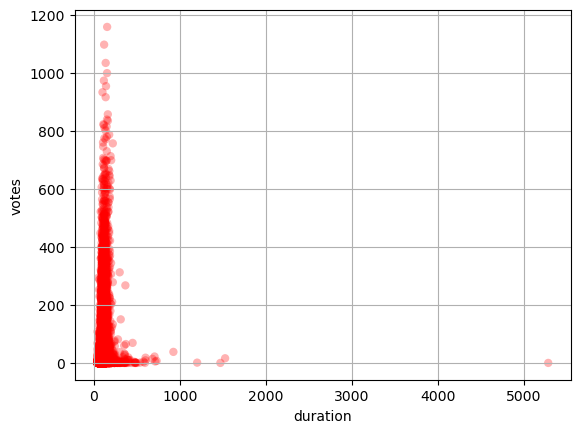

In [7]:
duration = df['duration']
votes = df['votes']
fig, ax = plt.subplots()
ax.scatter(duration, votes, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('votes')
plt.show()

Рассмотрим выборку duration - сколько длится фильм по времени.

Складываем все значения выборки и делим на количество элементов в выборке

In [9]:
statistics.mean(df['duration'])

99.23111689086916

In [10]:
sum(df['duration'])/len(df['duration'])

99.23111689086916

# Медиана

Возьмем колонку Duration - продолжительность фильма - и посчитаем медиану. **Медиана** - это такое значение, что ровно половина выборки меньше него, а ровно половина - больше. 

1ый способ:

In [11]:
# Извлекаем duration 
duration = df['duration']

# Находим их количество
num_duration = len(duration)

# Сортируем в порядке возрастания
sorted_duration = sorted(duration)

# Ищем индекс среднего элемента
# если количество элементов четное, то берем среднее двух элементов в середине
middle = (num_duration // 2)
if num_duration%2==0:
  result = (sorted_duration[middle-1] + sorted_duration[middle])/2
else:
  result = sorted_duration[middle]
# Находим медиану
print('Медиана: ', result)

Медиана:  95


In [12]:
len(sorted_duration)

46907

2ой способ:

In [13]:
import statistics
print('Медиана: ', statistics.median(df['duration']))

Медиана:  95


# Мода

Мода - значение, которое наиболее часто встречается в выборке

In [14]:
# Создаём пустой словарь, в котором будем считать количество появлений значений продолжительности фильма
duration_counts = {}
for p in duration:
    if p not in duration_counts:
        duration_counts[p] = 1
    else:
        duration_counts[p] += 1

# Проходимся по словарю и ищем максимальное количество повторений
# Алгоритм поиска максимума
maxp = 0
mode_duration = None
for k, v in duration_counts.items():
    if maxp < v:
        maxp = v
        mode_duration = k
print('Значение моды: ', mode_duration, 'Количество встречаемости: ', maxp)


Значение моды:  90 Количество встречаемости:  5511


In [15]:
duration_counts

{76: 173,
 98: 1159,
 91: 1156,
 95: 2304,
 85: 1265,
 117: 273,
 93: 1350,
 109: 423,
 80: 791,
 115: 562,
 101: 663,
 90: 5511,
 96: 1181,
 100: 2863,
 111: 302,
 62: 43,
 105: 1293,
 92: 1435,
 110: 1102,
 89: 1117,
 99: 798,
 88: 1207,
 113: 358,
 120: 952,
 94: 1113,
 102: 767,
 114: 301,
 130: 207,
 138: 73,
 84: 675,
 75: 325,
 104: 749,
 108: 570,
 97: 1034,
 77: 187,
 68: 77,
 107: 558,
 78: 324,
 86: 864,
 123: 199,
 82: 533,
 106: 587,
 112: 446,
 103: 727,
 140: 136,
 60: 153,
 122: 181,
 116: 256,
 132: 103,
 73: 146,
 42: 16,
 70: 193,
 87: 1011,
 180: 117,
 146: 37,
 220: 15,
 136: 63,
 134: 76,
 79: 189,
 50: 73,
 81: 351,
 166: 11,
 121: 178,
 125: 252,
 83: 566,
 135: 150,
 128: 137,
 124: 189,
 74: 136,
 160: 31,
 174: 6,
 158: 20,
 72: 148,
 144: 46,
 69: 57,
 162: 12,
 63: 55,
 57: 33,
 118: 324,
 250: 2,
 126: 135,
 129: 108,
 45: 44,
 67: 57,
 119: 234,
 143: 47,
 127: 149,
 150: 81,
 71: 113,
 184: 11,
 148: 34,
 66: 46,
 212: 3,
 156: 15,
 65: 97,
 192: 6,
 43:

In [16]:
print('Значение моды: ', statistics.mode(duration))

Значение моды:  90


# Минимум и максимум

In [17]:
min(duration)

40

In [18]:
max(duration)

5280

# Выбросы

В табличных данных выбросы - либо переменной нет в таблице, либо значение слишком варьируется от среднего значения выборки.

**Выбросы** - отсутствующих значений в данной колонке нет

In [19]:
duration.isnull().sum()

0

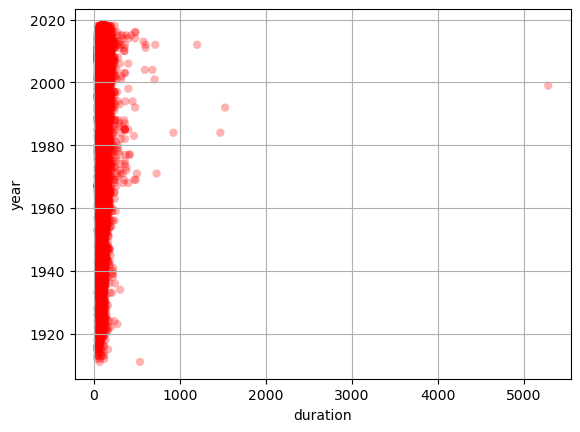

In [20]:
duration = df['duration']
year = df['year']
fig, ax = plt.subplots()
ax.scatter(duration, year, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

По графику можно увидеть, что есть некое значение, выходящее за рамки всех остальных значений. Найдем его.

In [21]:
duration[duration>600]

23844     924
23845    1525
23846     729
24019     680
27462    1470
27639    5280
39271     713
41240    1200
42871     705
Name: duration, dtype: int64

Удалим эти значения, считая их выбросами.

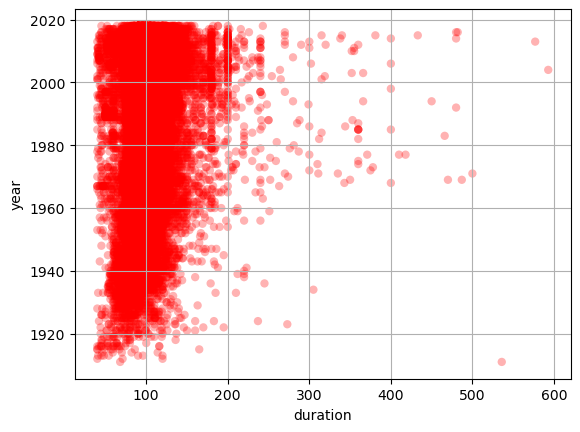

In [22]:
duration_new = duration[duration<600]
year_new = year[duration<600]

fig, ax = plt.subplots()
ax.scatter(duration_new, year_new, c='red', alpha=0.3, edgecolors='none')

ax.grid(True)
plt.xlabel('duration')
plt.ylabel('year')
plt.show()

Можно заметить, что картина стала более ясная после удаления выбросов.

Есть отсутствующие значения в колонке actors

In [23]:
df['actors'].isnull().sum()

129

# Стандартное отклонение

Мера разброса данных (насколько данные варьируются от среднего значения) - корень среднего квадратичного отклонения.

1ой метод:

In [24]:
statistics.pstdev(duration)

34.95860443683266

2ой метод:

In [25]:
def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(duration))

34.9589770801773


# Дисперсия

Дисперсия - квадрат стандартного отклонения

In [26]:
statistics.pvariance(duration)

1222.1040241709359

In [27]:
34.9589770801773**2

1222.1300784923617

# Размах

Разница между минимальным и максимальным значениями

In [28]:
duration_range = max(duration) - min(duration)
print(duration_range)

5240


Можно посмотреть разброс фильмов по их продолжительности.

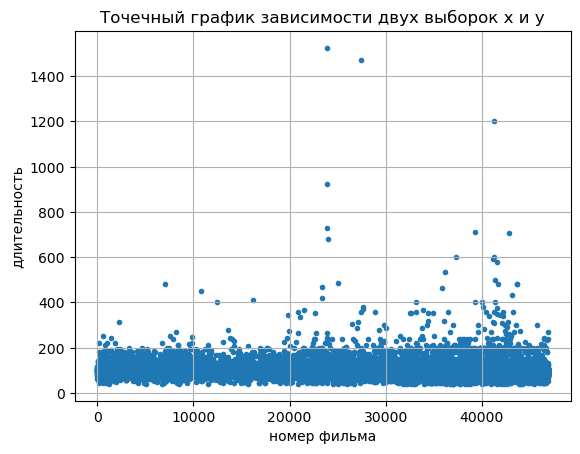

In [29]:
x = [i for i in range(0, len(duration)-1)]
y = df.loc[df['duration'] < 5000, 'duration']

plt.xlabel('номер фильма')
plt.ylabel('длительность')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()

Фильм, продолжительность которого составляет более 5000 секунд:

In [30]:
df.loc[df['duration'] > 5000, :]

,filmtv_ID,film_title,year,genre,duration,country,director,actors,avg_vote,votes
27639,35647,Farscape,1999,Adventure,5280,United States,"Geoff Bennett, Tony Tilse, Ian Watson","Ben Browder, Virginia Hey, Wayne Pigram, Claud...",8.0,1


Оказывается, что "Farscape" - австралийско-американский фантастический телевизионный сериал. Всего в данном сериале 90 серий. 

# Коррелляция

Взаимосвязь двух выборок друг от друга. Чтобы графически увидеть взаимосвязь двух переменных, необходимо построить точечный график зависимости друг от друга. Например, возьмер 2 параметра - duration и votes. Зависит ли средняя оценка фильма от того, насколько долго он идет?

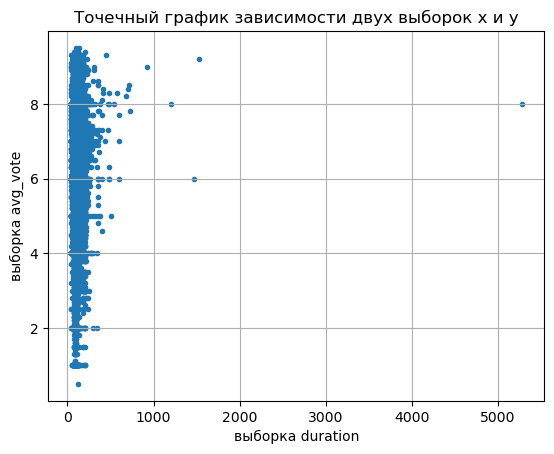

In [31]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

Удалим фильм под номером 35647 - сериал "Farscape", так как он явно является нестандартом для данной выборки. 

In [32]:
df = df.loc[df['filmtv_ID']!=35647, :]

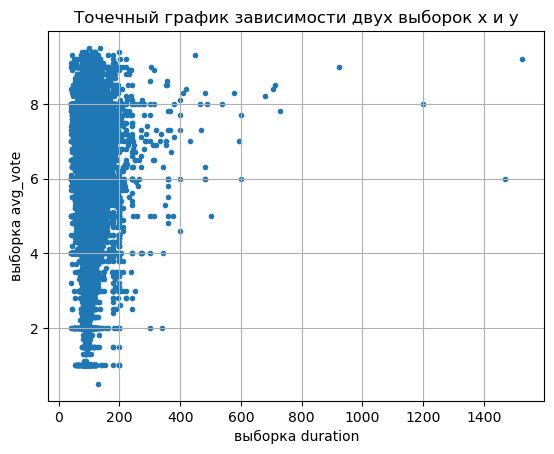

In [33]:
duration = df['duration']
avg_vote = df['avg_vote']
plt.xlabel('выборка duration')
plt.ylabel('выборка avg_vote')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(duration, avg_vote, marker='.')

**Выводы по графику** - чем длиннее фильм, тем выше у данного фильма оценка.

По данному графику можно заметить, что чем короткие фильмы имеют разные оценки - как низкие, так и высокие. Фильмы средней и большой длины имеют тенденция получать высокие оценки. Таким образом, между двумя выборками мы можем увидеть сильную коррелляцию.

# Нормальное распределение

**Посмотрим как выглядит нормальное распределение на практике**. Возьмем табличное значение avg_vote - среднее значение голосов за данный фильм. Посмотрим график распределения данной величины.

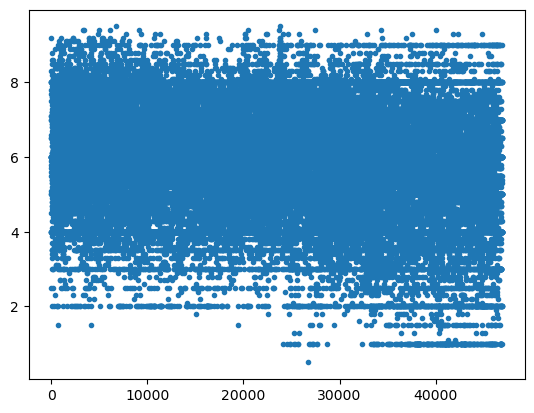

In [34]:
len_column = len(df['avg_vote']) # сколько значений в колонке
# генерируем значения от 0 до len_column 
x = np.linspace(0, len_column, len_column)
plt.scatter(x, df['avg_vote'], marker='.')

По такому графику сложно понять, какое это распределение. Построим частотный график значений. 

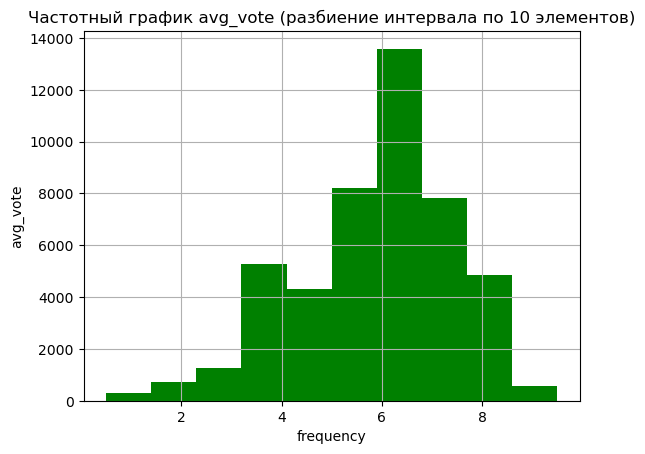

In [35]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['avg_vote'], 10, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()

Частотный график схож с нормальным распределением с некоторыми отклонениями. Мы можем поменять количество разбиений наших значений с 10 на 100:

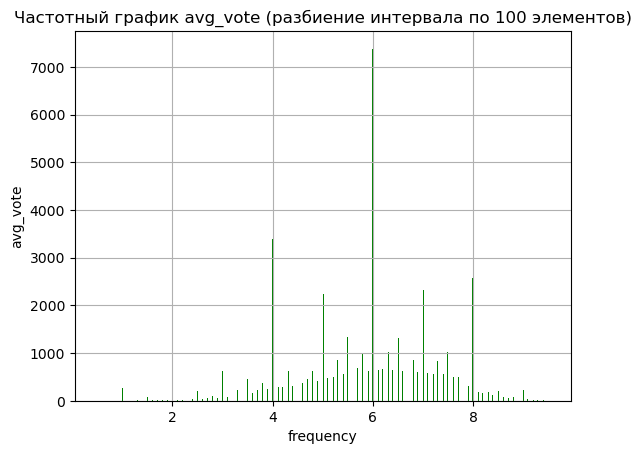

In [36]:
n, bins, patches = plt.hist(df['avg_vote'], 500, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('avg_vote')
plt.title('Частотный график avg_vote (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Можно заметить, что у фильмов больше всего оценок 6 (всего таких фильмов со средней оценкой 6 более 7000)

**Зададим нормальное распределение теоритически.**

Зададим 2 выборки с нормальным распределением и построим точечный график зависимости двух переменных друг от друга.
Параметр ```loc``` задаёт $\mu$ или среднее значение, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.


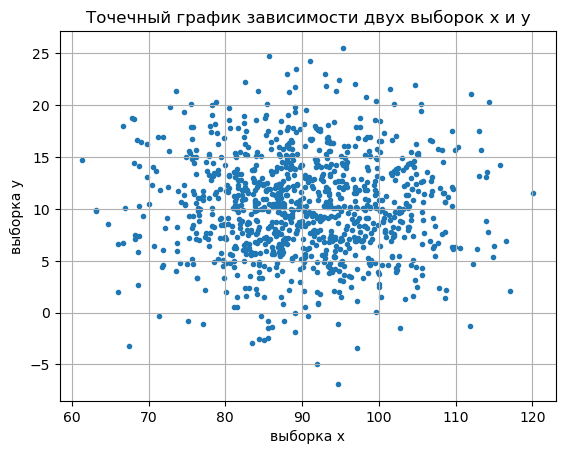

In [41]:
mu1 = 90
sigma1 = 10

mu2 = 10 
sigma2 = 5

amount = 1000

# зададим 2 нормально распределенные случайные величины
norm_rv1 = sts.norm(loc=mu1, scale=sigma1)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2)

# сгенерируем 1000 значений
x = norm_rv1.rvs(size=amount)
y = norm_rv2.rvs(size=amount)

# построим точечный график зависимости двух переменных

plt.xlabel('выборка x')
plt.ylabel('выборка y')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(x, y, marker='.')

Частотный график выборки y  (или график плотности вероятности).

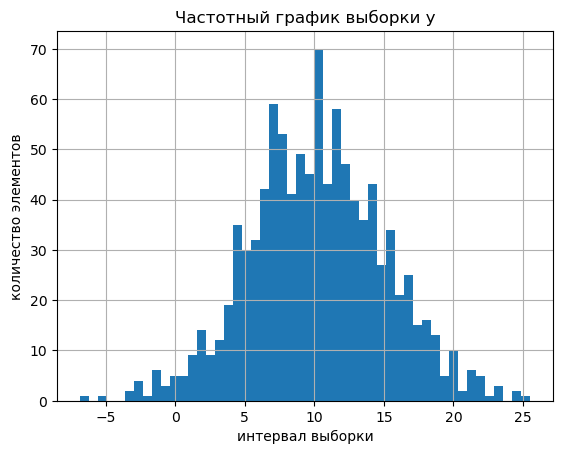

In [42]:
plt.hist(y,50)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки y')
plt.grid(True)
plt.show()

2-ой способ теоритической генерации нормального распределения: модуль random. 

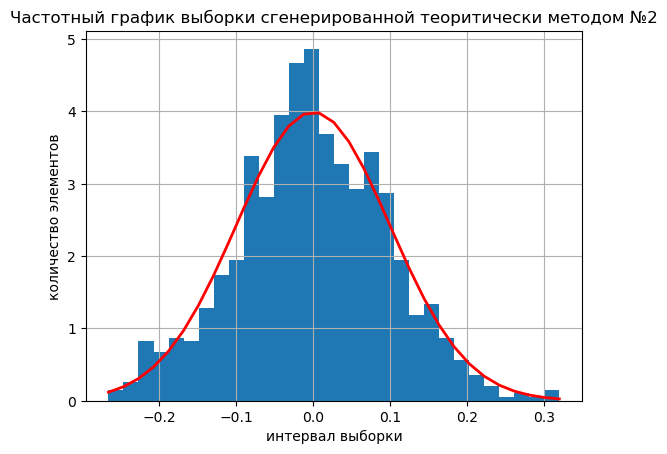

In [43]:
mu, sigma = 0, 0.1 # среднее значение и дисперсия
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, density=True)
# bins - разбиение интервала
# формула плотности распределения Гаусса
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ), 
         linewidth=2, color='r') #Это красная линия построенная по формуле Гаусса
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график выборки сгенерированной теоритически методом №2')
plt.grid(True)
plt.show()

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [40]:
norm_rv1.pdf(3)

1.4622963575006582e-18

Построим графики функции плотности вероятности от различных выборок (с разными параметрами):

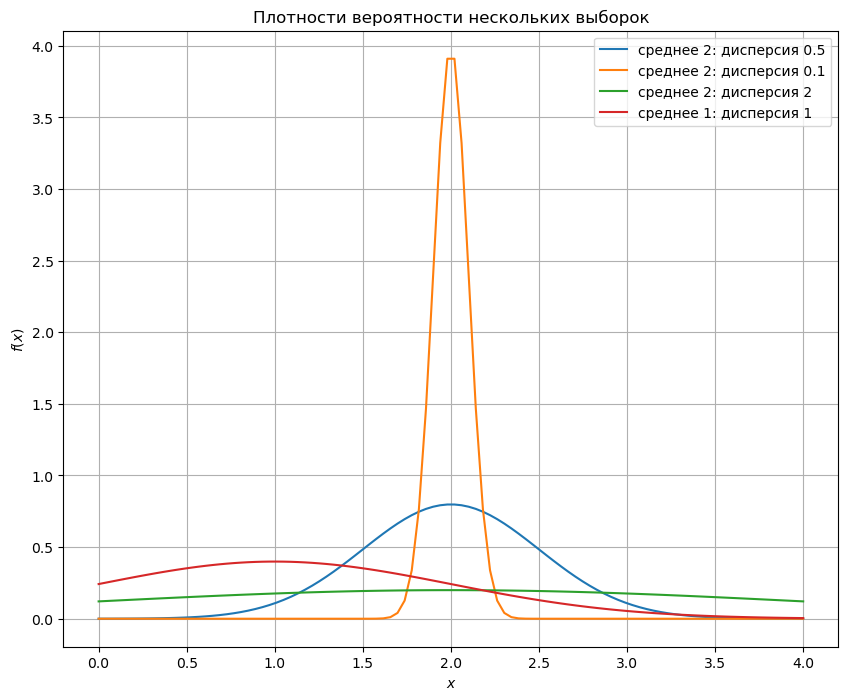

In [47]:
# зададим нормально распределенную случайную величину для нескольких выборок
norm_rv = sts.norm(loc=2, scale=0.5)
norm_rv2 = sts.norm(2, 0.1)
norm_rv3 = sts.norm(2, 2)
norm_rv4 = sts.norm(1, 1)

# зададим вектор x от 0 до 4 с шагом 100 для отрисовки результата
x = np.linspace(0,4,100) 
pdf = norm_rv.pdf(x)
pdf2 = norm_rv2.pdf(x)
pdf3 = norm_rv3.pdf(x)
pdf4 = norm_rv4.pdf(x)
plt.figure(figsize=(10,8))
plt.plot(x, pdf)
plt.plot(x, pdf2)
plt.plot(x, pdf3)
plt.plot(x, pdf4)

plt.legend(['среднее 2: дисперсия 0.5', 'среднее 2: дисперсия 0.1', 'среднее 2: дисперсия 2', 'среднее 1: дисперсия 1'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.grid(True)

# Равномерное распределение на отрезке

Равномерное распределение на практике - это числа идущие последовательно от 0 до целого числа N. В равномерной выборке каждый элемент встречается одинаковое число раз.

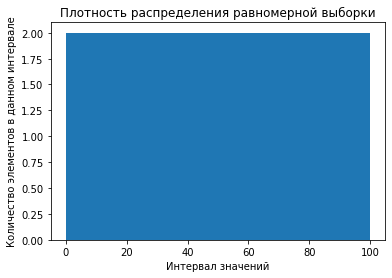

In [83]:
x = np.linspace(0, 100, 100)

plt.ylabel('Количество элементов в данном интервале')
plt.xlabel('Интервал значений')
plt.title('Плотность распределения равномерной выборки')
plt.hist(x, 50)
plt.show()

Сгенерируем теоритически выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

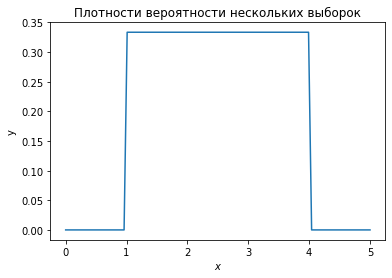

In [84]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

# сгенерируем вектор x для отрисовки значения в pyplot.plot()
x = np.linspace(0, 5, 100)
pdf = uniform_rv.pdf(x)

plt.ylabel('y')
plt.xlabel('$x$')
plt.title('Плотности вероятности нескольких выборок')
plt.plot(x, pdf)

# Нормализация данных

Операция центрирования

In [48]:
duration = df['duration']
print(statistics.mean(duration))

99.12066686564619


Так как среднее значение не равно 0, необходимо нормализовать.

In [49]:
duration_1 = duration - statistics.mean(duration)
print(statistics.mean(duration_1))

2.4903685191438297e-16


Масштабирование выборки

Разброс данных приводим к виду (0,1)  либо (-1,1)

In [50]:
min(duration_1)

-59.120666865646186

In [51]:
max(duration_1)

1425.8793331343538

In [52]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

duration_2 = min_max_scaler.fit_transform(np.array(duration_1).reshape(-1, 1))
print(min(duration_2))
print(max(duration_2))

[-1.]
[1.]


# Корелляция Пирсона

Коэффициент корреляции Пирсона: 1.0


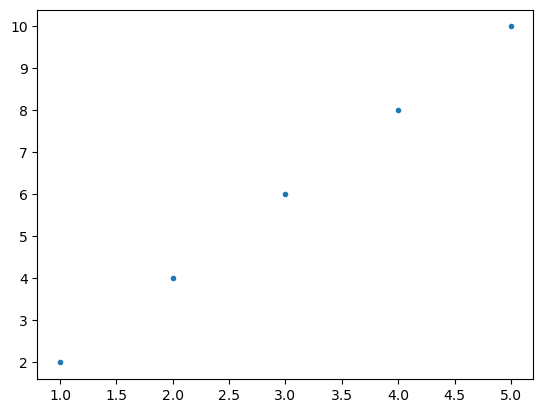

In [53]:
from scipy.stats import pearsonr
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Чтобы приступать к расчетам коэффициента корреляции r-Пирсона необходимо выполнение следующих условий:

*  Исследуемые переменные X и Y должны быть распределены нормально (делаем допущение, что переменные распределены нормально).
*  Исследуемые переменные X и Y должны быть измерены в интервальной шкале или шкале отношений.
*  Количество значений в исследуемых переменных X и Y должно быть одинаковым.

Чем коэффициент ближе к 0, тем более независимы переменные.

In [54]:
corr, p_value = pearsonr(duration, avg_vote)
print(corr)

0.11117891144787746


**Минусы коэффициента корреляции Пирсона:**
- Неустойчивость к выбросам.
- С помощью коэффициента корреляции Пирсона можно определить только силу линейной взаимосвязи между переменными, другие виды взаимосвязей выявляются методами регрессионного анализа.

# Центральная предельная теорема

С помощью библиотеки numpy.random и метода randint сгенерируем нормальное распределение

In [3]:
from numpy.random import randint

(array([ 8.,  8.,  9.,  6.,  9., 10.]),
 array([1.        , 1.83333333, 2.66666667, 3.5       , 4.33333333,
        5.16666667, 6.        ]),
 <BarContainer object of 6 artists>)

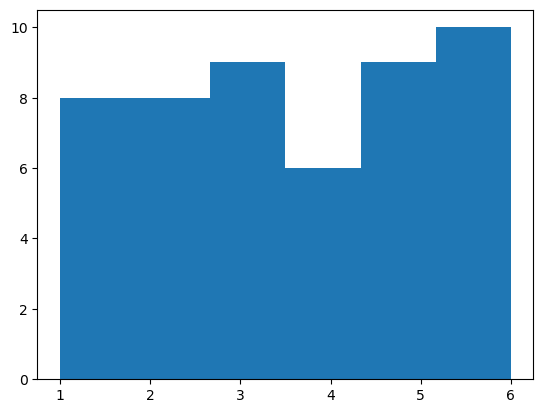

In [9]:
plt.hist(randint (1, 7, 50), 6) # числа от 1 до 7, 50 выборок

In [10]:
Построим частотный  для суммы элементов нескольких выборок

SyntaxError: invalid syntax (687791956.py, line 1)

In [11]:
SampleMeans = []

In [12]:
for _ in range (50): # 50 элементов от 1 до 7
    SampleMean = sum(randint (1, 7, 50))
    SampleMeans.append (SampleMean) 
    
    

(array([2., 1., 1., 0., 0., 0., 0., 0., 0., 1., 2., 1., 1., 1., 0., 1., 4.,
        4., 1., 1., 3., 0., 0., 1., 3., 1., 1., 3., 0., 2., 1., 1., 0., 1.,
        0., 0., 1., 1., 1., 1., 2., 0., 0., 2., 1., 0., 1., 1., 0., 1.]),
 array([155.  , 155.86, 156.72, 157.58, 158.44, 159.3 , 160.16, 161.02,
        161.88, 162.74, 163.6 , 164.46, 165.32, 166.18, 167.04, 167.9 ,
        168.76, 169.62, 170.48, 171.34, 172.2 , 173.06, 173.92, 174.78,
        175.64, 176.5 , 177.36, 178.22, 179.08, 179.94, 180.8 , 181.66,
        182.52, 183.38, 184.24, 185.1 , 185.96, 186.82, 187.68, 188.54,
        189.4 , 190.26, 191.12, 191.98, 192.84, 193.7 , 194.56, 195.42,
        196.28, 197.14, 198.  ]),
 <BarContainer object of 50 artists>)

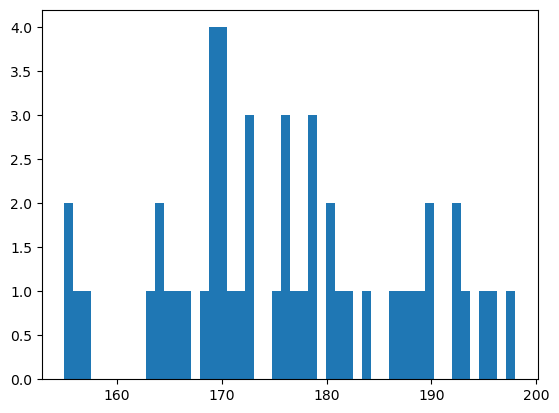

In [7]:
# Строим график
plt.hist (SampleMeans, 50)
#plt.show


# Пример корелляции данных, загруженных с помощью pandas

Загружаем данные о ценах на авокадо в США

In [87]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

HTTPError: HTTP Error 404: Not Found

Данные представляют собой time-series data, или временной ряд. В каждый из дней даны такие показатели, как:


*   Date - день показания
*   AveragePrice - средняя цена на один авокадо (авокадо продаются обычно в брикетах по несколько штук)
*   Total Volume - сколько всего было куплено авокадо
*   4046 - общее количество авокадо с кодом 4046
*   4225 - общее количество авокадо с кодом 4225
*   4770 - общее количество авокадо с кодом 4770
*   Total Bags - количество проданных брикетов всего
*   Small Bags - количество проданных малых брикетов
*   Large Bags - количество проданных больших брикетов
*   XLarge Bags - количество проданных XLarge брикетов
*   type - conventional или organic
*   year - год продажи
*   region - регион показаний




Более подробно можно почитать о датасете цен на авокадо: https://www.kaggle.com/neuromusic/avocado-prices

Печатаем 5 значений

In [107]:
df[:5]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Размер выборки:

In [108]:
len(df)

18249

Нормализация значений

In [109]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', 'Total Bags']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

          0         1
0  0.001026  0.000449
1  0.000877  0.000491
2  0.001890  0.000420
3  0.001262  0.000300
4  0.000815  0.000319


Корелляция скорее всего между Total Volume и Total Bags 

In [0]:
volume = df_norm[0]
bags = df_norm[1]

Посмотрим насколько они зависят друг от друга:

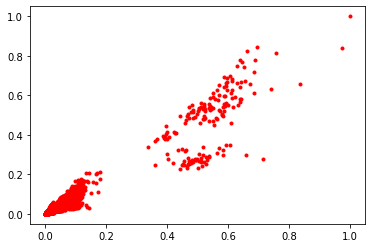

In [111]:
plt.plot(volume, bags, 'r.')
plt.show()

In [112]:
corr, p_value = pearsonr(volume, bags)
print(corr)

0.9630470824267293


Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html

Матрица корреляций.

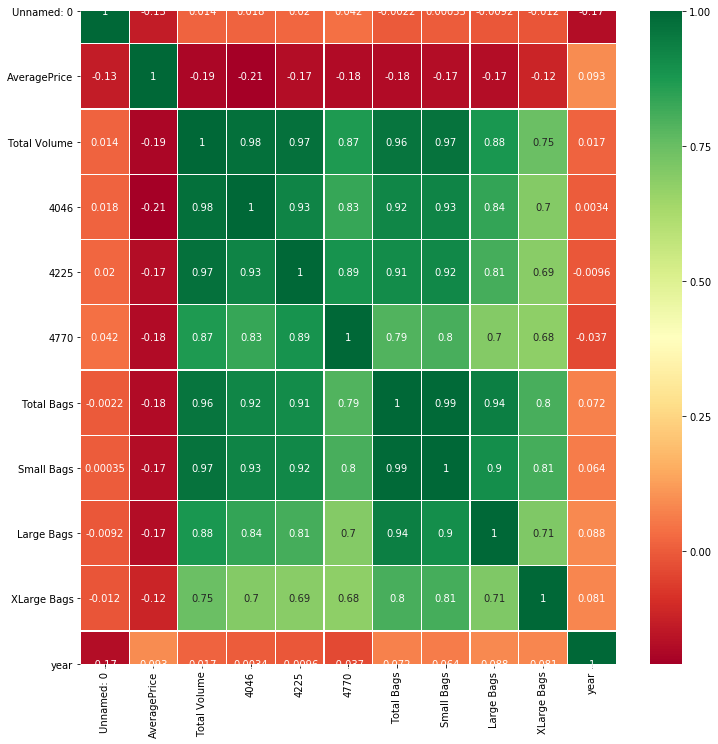

In [113]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()


In [114]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


В выборке имеется два вида авокадо: промышленный и органический. Выберем промышленный авокадо для анализа.

In [0]:
PREDICTION_TYPE = 'conventional'
df_conv = df[df.type == PREDICTION_TYPE]

In [120]:
regions = df_conv.groupby(df_conv.region)
print("Всего регионов в выборке :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Всего регионов в выборке : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169

У нас есть задание проанализировать рынок для определенного региона: TotalUS.

In [0]:
PREDICTING_FOR = "TotalUS"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

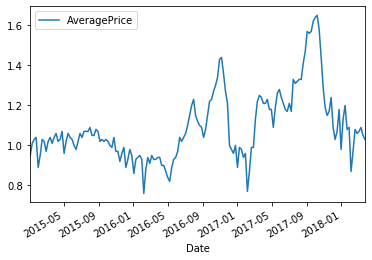

In [180]:
date_price.plot(x='Date', y='AveragePrice', kind="line")

Итак, у нас есть исторические данные, и мы хотим предсказать на их основе, как будет меняться цена в будущем. Для этого можно использовать разные методы. Допустим, мы хотим реализовать имеющийся инструмент - [Prophet](https://facebook.github.io/prophet/docs/quick_start.html)

Во-первых, переименуем столбцы как того требует prophet.

In [0]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

Во-вторых, разделим данные на 80% тренировочных и на 20% тестовых:

In [0]:
date_price = date_price.sort_values(by='ds')

In [0]:
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]


In [200]:
train_price.head()

,ds,y
51,2015-01-04,0.95
50,2015-01-11,1.01
49,2015-01-18,1.03
48,2015-01-25,1.04
47,2015-02-01,0.89


In [201]:
train_price.tail()

,ds,y
130,2017-07-02,1.21
129,2017-07-09,1.17
128,2017-07-16,1.33
127,2017-07-23,1.31
126,2017-07-30,1.32


In [202]:
test_price.head()

,ds,y
125,2017-08-06,1.33
124,2017-08-13,1.33
123,2017-08-20,1.41
122,2017-08-27,1.47
121,2017-09-03,1.57


In [203]:
test_price.tail()

,ds,y
161,2018-02-25,1.06
160,2018-03-04,1.07
159,2018-03-11,1.09
158,2018-03-18,1.05
157,2018-03-25,1.03


В-третьих, обучим модель:

In [204]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Сделаем предсказания для тестового периода:

Посчитаем, насколько дней вперед надо сделать предсказания

In [205]:
train_price.tail()

,ds,y
130,2017-07-02,1.21
129,2017-07-09,1.17
128,2017-07-16,1.33
127,2017-07-23,1.31
126,2017-07-30,1.32


In [206]:
test_price.tail()

,ds,y
161,2018-02-25,1.06
160,2018-03-04,1.07
159,2018-03-11,1.09
158,2018-03-18,1.05
157,2018-03-25,1.03


Последний день тренировочных данных - это 30 июля 2017. Последний день тестовых данных - это 25 марта 2018. Нам нужно сделать предсказания на примерно 240 дней вперед.

In [0]:
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)

In [208]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.091091,0.899190,1.071263,1.091091,1.091091,-0.111321,-0.111321,-0.111321,-0.111321,-0.111321,-0.111321,0.0,0.0,0.0,0.979770
1,2015-01-11,1.088003,0.911099,1.086507,1.088003,1.088003,-0.093034,-0.093034,-0.093034,-0.093034,-0.093034,-0.093034,0.0,0.0,0.0,0.994969
2,2015-01-18,1.084915,0.914144,1.077757,1.084915,1.084915,-0.087826,-0.087826,-0.087826,-0.087826,-0.087826,-0.087826,0.0,0.0,0.0,0.997089
3,2015-01-25,1.081827,0.884693,1.052431,1.081827,1.081827,-0.112888,-0.112888,-0.112888,-0.112888,-0.112888,-0.112888,0.0,0.0,0.0,0.968939
4,2015-02-01,1.078739,0.840428,1.007727,1.078739,1.078739,-0.156223,-0.156223,-0.156223,-0.156223,-0.156223,-0.156223,0.0,0.0,0.0,0.922516


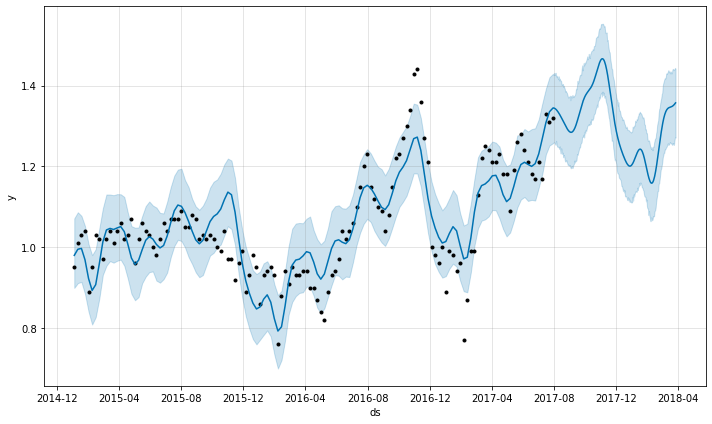

In [209]:
fig1 = m.plot(forecast)

Сравним с тем, что было на самом деле в этот период:

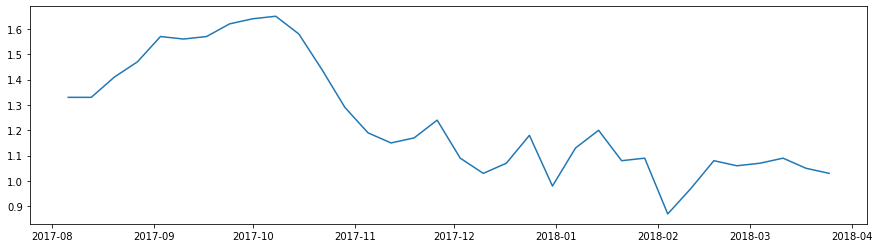

In [213]:
plt.figure(figsize=(15,4))
plt.plot(test_price['ds'], test_price['y'])
plt.show()

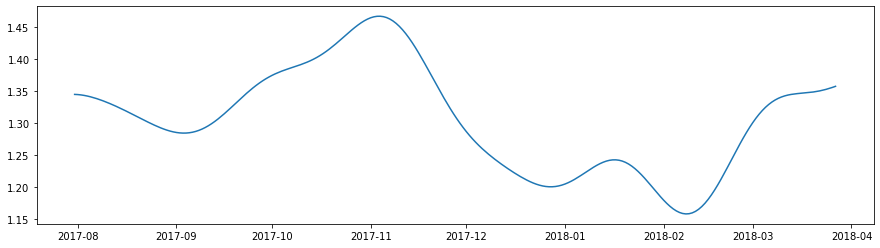

In [223]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.show()

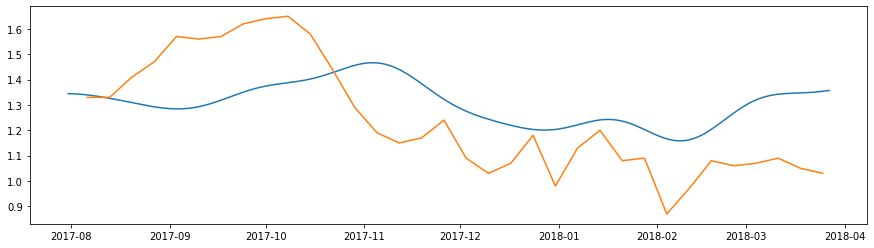

In [224]:
plt.figure(figsize=(15,4))
forecast_future = forecast.iloc[135:,:]
plt.plot(forecast_future['ds'], forecast_future['yhat'])
plt.plot(test_price['ds'], test_price['y'])
plt.show()

Модель не совсем точна, но есть некая корреляция между данными.

Можно посчитать среднюю ошибку модели. 